<a href="https://colab.research.google.com/github/andrew-wairegi-school/matrix-project-core-module-1/blob/main/Week_5_Matrix_team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the question

### a) Specifying the Data Analytic Question

To identify the trends and causes of fatalities on Australian roads from the year 1989 to 2021. Using exploratory data analysis

### b) Defining the Metric for Success

To be able to find the answer to our hypothesis. Using a hypothesis test

### c) Understanding the context 

According to research, there have been more than 189,000 deaths on Australia’s roads. Approximately four people die and 90 people are seriously injured each day. The cost of road trauma to the Australian community is tragic and widespread.
Our project focuses on analyzing crash fatalities data in Australia according to several factors, including gender, age, state,  age group, type of road users, day of the week, and time of the week.


### d) Recording the Experimental Design

1. Previewing the dataset
2. Data Cleaning
3. Data Analysis
4. Hypothesis creation & testing

### e) Data Relevance

The data is relevant because it has upto date information on the road accidents in Australia from 1989 to 2021. This will allow us to analyze the data effectively.

## 2. Reading the data

In [62]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Loading the data
df = pd.read_csv('Crash_Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 3. Checking the Data

In [64]:
# Checking the data
df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,110,Pedestrian,Female,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,NaN,Passenger,Male,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,NaN,Driver,Male,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [65]:
# Checking the tail
df.tail()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,NaN,No,60,Passenger,Female,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52842,19896063,Tas,1,1989,Tuesday,12:40,Multiple,No,NaN,No,60,Passenger,Female,63,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Day


In [66]:
# Determining the number of records
df.shape

(52843, 23)

In [67]:
# Checking for unique values
df.nunique()

Crash ID                         47567
State                                8
Month                               12
Year                                33
Dayweek                              7
Time                              1413
Crash Type                           2
Bus Involvement                      2
Heavy Rigid Truck Involvement        2
Articulated Truck Involvement        2
Speed Limit                         30
Road User                            7
Gender                               3
Age                                103
National Remoteness Areas            5
SA4 Name 2016                       88
National LGA Name 2017             500
National Road Type                  13
Christmas Period                     2
Easter Period                        2
Age Group                            6
Day of week                          2
Time of day                          2
dtype: int64

In [68]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

## 4. External Data Source Validation

It is from the Australian government, from the Bureau of Infrastructure and Transport. It was stored in the Australian Road Deaths Database (ARDD), on the Australian website. It was then uploaded to Kaggle by "Deep Contractor". The link to the dataset is [here](https://data.gov.au/dataset/ds-dga-5b530fb8-526e-4fbf-b0f6-aa24e84e4277/details?q=ardd) 

## 5. Cleaning

In [69]:
# 1. Dropping the null values

# Checking for the missing values
df.isnull().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

In [70]:
# Dropping the columns
df = df.drop(["National Remoteness Areas", "SA4 Name 2016", "National LGA Name 2017", "National Road Type", "Heavy Rigid Truck Involvement"], axis = 1)

In [71]:
# Dropping the rows
df = df.dropna(axis = 0)

In [72]:
# Checking for null values
df.isnull().sum()

Crash ID                         0
State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Articulated Truck Involvement    0
Speed Limit                      0
Road User                        0
Gender                           0
Age                              0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64

In [73]:
# 2. Conversion to date time datatype
df["Time"] = pd.to_datetime(df["Time"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51997 entries, 1 to 52842
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Crash ID                       51997 non-null  int64         
 1   State                          51997 non-null  object        
 2   Month                          51997 non-null  int64         
 3   Year                           51997 non-null  int64         
 4   Dayweek                        51997 non-null  object        
 5   Time                           51997 non-null  datetime64[ns]
 6   Crash Type                     51997 non-null  object        
 7   Bus Involvement                51997 non-null  object        
 8   Articulated Truck Involvement  51997 non-null  object        
 9   Speed Limit                    51997 non-null  object        
 10  Road User                      51997 non-null  object        
 11  Gender         

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


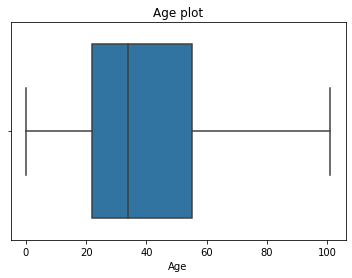

In [116]:
# 3. Checking for outliers
plt.title("Age plot")
sns.boxplot(df['Age'])
plt.show()

In [76]:
# 4. Checking for duplicates
df.duplicated().sum()

142

In [77]:
# Dropping
df = df.drop_duplicates()

In [78]:
df.duplicated().sum()

0

## 6. Exploratory Analysis

#### Univariate

In [79]:
#frequency table for the state column 
df["State"].value_counts()

NSW    16186
Vic    11351
Qld    10440
WA      6122
SA      4527
Tas     1537
NT      1367
ACT      325
Name: State, dtype: int64

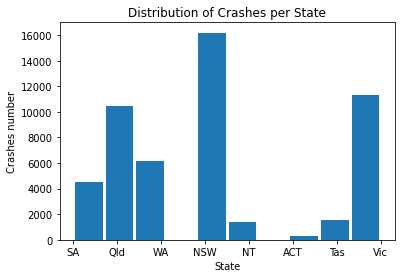

<Figure size 288x216 with 0 Axes>

In [80]:
#visualising the frequency table for state using histogram
plt.hist(df["State"], bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('State')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per State') 
plt.figure(figsize=(4, 3))
plt.show()
#NSW state had the highest number of fatalities at 16186 and ACT and the least number of fatalities at 325.

In [81]:
#frequency tAfor the crash type column 
df["Crash Type"].value_counts()

Single      28585
Multiple    23270
Name: Crash Type, dtype: int64

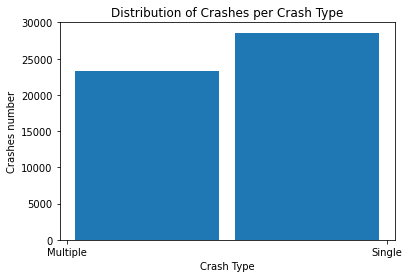

<Figure size 288x216 with 0 Axes>

In [82]:
#creating a histogram for types of crashes
plt.hist(df["Crash Type"], bins=2, histtype='bar', rwidth=0.9)
plt.xlabel('Crash Type')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Crash Type') 
plt.figure(figsize=(4, 3))
plt.show()
#There were more single crashes at 28585 than the multiple crushes at 23270 with a difference of approximately 5000 fatalities

In [83]:
#summary for the Road user column 
df["Road User"].value_counts()

Driver                          23505
Passenger                       11858
Pedestrian                       8107
Motorcycle rider                 6555
Pedal cyclist                    1402
Motorcycle pillion passenger      358
Other/-9                           70
Name: Road User, dtype: int64

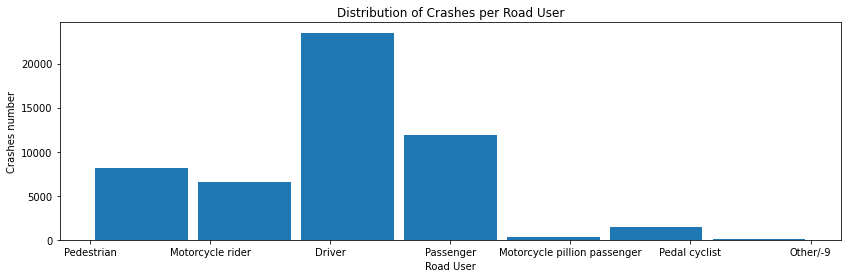

In [84]:
#creating a histogram for number of crashes for different road users
plt.figure(figsize=(14, 4))
plt.hist(df["Road User"], bins=7, histtype='bar', rwidth=0.9)
plt.xlabel('Road User')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Road User') 
plt.show()
#The drivers were the leading victims of fatalities with 23,505 and the others who were not specified with 70

In [85]:
#summary for the age column 
df['Age Group'].value_counts()

17_to_25       13505
40_to_64       13238
26_to_39       12135
75_or_older     5045
0_to_16         3969
65_to_74        3963
Name: Age Group, dtype: int64

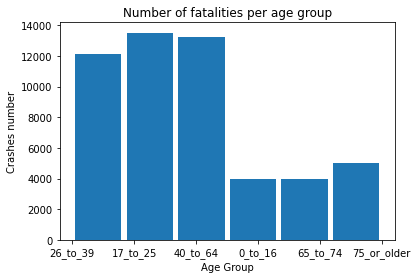

<Figure size 288x216 with 0 Axes>

In [86]:
#creating a histogram for number of crashes for different ages groups
plt.hist(df["Age Group"], histtype='bar', rwidth=0.9, bins = 6)
plt.xlabel('Age Group')
plt.ylabel('Crashes number')
plt.title('Number of fatalities per age group') 
plt.figure(figsize=(4, 3))
plt.show()


In [87]:
#summary for the age column 
df['Age'].describe()

count    51855.000000
mean        39.828445
std         21.732201
min          0.000000
25%         22.000000
50%         34.000000
75%         55.000000
max        101.000000
Name: Age, dtype: float64

Specific objective: To determine the number of road fatalities experienced  by different age groups

In [88]:
df["Age"].value_counts(bins = 10, sort = False)

(-0.10200000000000001, 10.1]     1972
(10.1, 20.2]                     8747
(20.2, 30.3]                    11854
(30.3, 40.4]                     7780
(40.4, 50.5]                     6070
(50.5, 60.6]                     4734
(60.6, 70.7]                     4144
(70.7, 80.8]                     3914
(80.8, 90.9]                     2316
(90.9, 101.0]                     324
Name: Age, dtype: int64

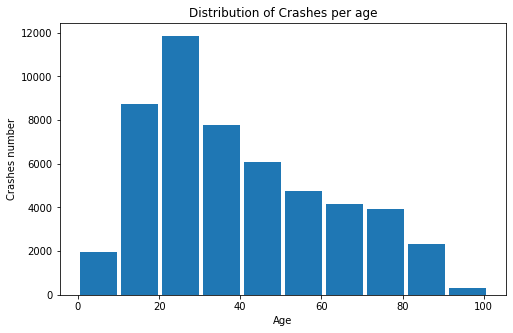

In [89]:
#Histogram for Distribution of Crashes per age
plt.figure(figsize=(8, 5))
plt.hist(df["Age"], bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per age') 
plt.show()
#The age group 20-30 are prone to more crash fatalities with11854 fatalities and the least affected age group is 90-100 which had 324 fatalities.

Specific objective: To determine the number of road fatalities experienced  by gender

In [90]:
#summary for the gender column 
df["Gender"].value_counts()

Male           37140
Female         14714
Unspecified        1
Name: Gender, dtype: int64

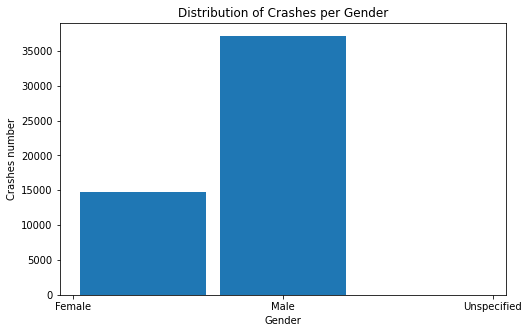

In [91]:
#creating a histogram for number of crashes per gender
plt.figure(figsize=(8, 5))
plt.hist(df["Gender"], histtype='bar', rwidth=0.9, bins = 3)
plt.xlabel('Gender')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Gender') 
plt.show()
#More men are prone to fatalities  than female

Specific objective: To determine the number of road fatalities occurring on different days of the week

In [92]:
#summary for the day od week column 
df["Dayweek"].value_counts()

Saturday     9489
Friday       8500
Sunday       8299
Thursday     6975
Wednesday    6538
Tuesday      6054
Monday       6000
Name: Dayweek, dtype: int64

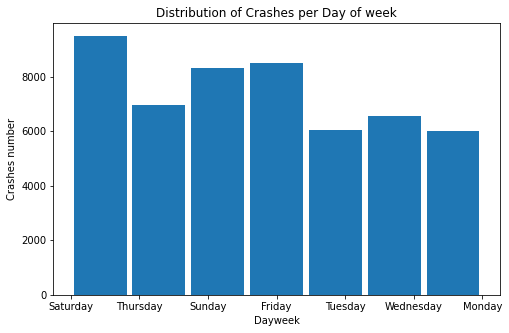

In [93]:
#creating a histogram for no.crashes for differenyt days of the week
plt.figure(figsize=(8, 5))
plt.hist(df["Dayweek"], histtype='bar', rwidth=0.9, bins = 7)
plt.xlabel('Dayweek')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week') 
plt.show()
#Saturday had the highest number of fatalities with  9489 and Monday had the least with 6000

#### Bivariate

In [94]:
#summary for the day of week and christmas column 
df[["Dayweek", "Christmas Period"]].value_counts(sort = False)

Dayweek    Christmas Period
Friday     No                  8291
           Yes                  209
Monday     No                  5804
           Yes                  196
Saturday   No                  9259
           Yes                  230
Sunday     No                  8077
           Yes                  222
Thursday   No                  6724
           Yes                  251
Tuesday    No                  5810
           Yes                  244
Wednesday  No                  6297
           Yes                  241
dtype: int64

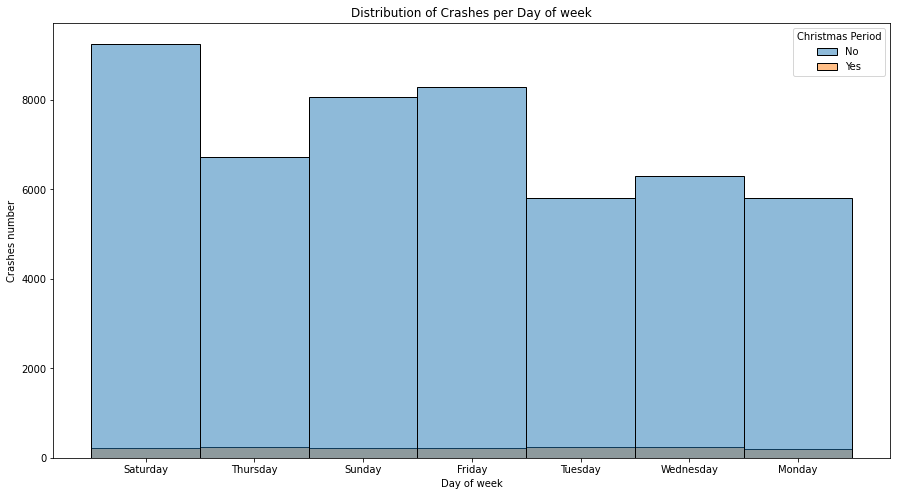

In [95]:
#Stacked column chart for days of week vs christmas period
plt.figure(figsize=(15, 8))
sns.histplot(x = df["Dayweek"], hue = df["Christmas Period"])
plt.xlabel('Day of week')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week') 
plt.show()


Because it is one day, few people travel. In that year.

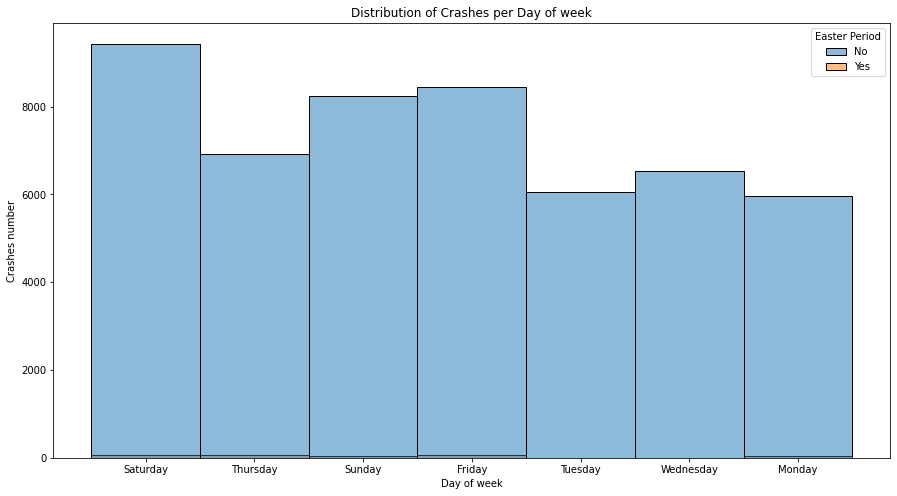

In [96]:
#Stacked column chart for days of week vs easter period
plt.figure(figsize=(15, 8))
sns.histplot(x = df["Dayweek"], hue = df["Easter Period"])
plt.xlabel('Day of week')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week') 
plt.show()

In [97]:
#summary for the day of week and easter column 
df[["Dayweek", "Easter Period"]].value_counts(sort = False)

Dayweek    Easter Period
Friday     No               8446
           Yes                54
Monday     No               5955
           Yes                45
Saturday   No               9433
           Yes                56
Sunday     No               8251
           Yes                48
Thursday   No               6917
           Yes                58
Tuesday    No               6052
           Yes                 2
Wednesday  No               6535
           Yes                 3
dtype: int64

They celebrate easter more than christmas. So they travel less. So there are fewer accidents

Specific objective: To determine the number of road fatalities occurring at different times of the day.

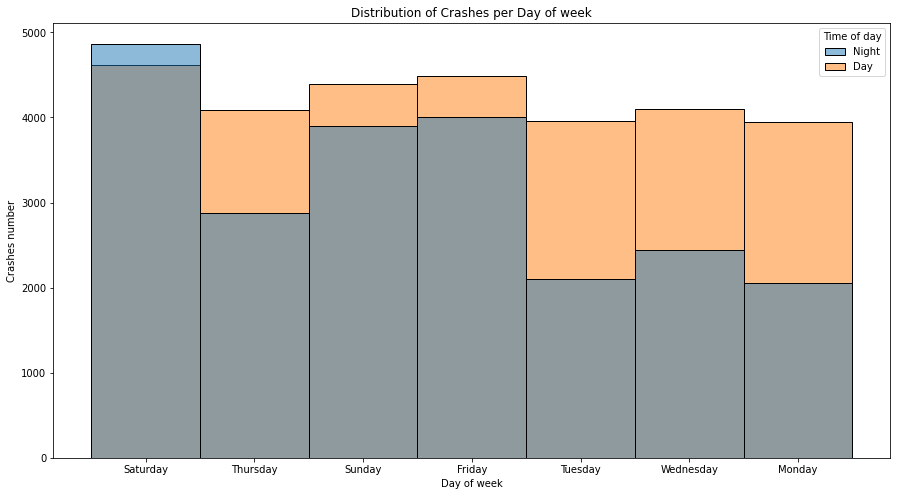

In [98]:
#Stacked column chart for days of week vs time of the day
plt.figure(figsize=(15, 8))
sns.histplot(x = df["Dayweek"], hue = df["Time of day"])
plt.xlabel('Day of week')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week') 
plt.show()

Specific objective: To determine the number of road fatalities over the period of 1989 to 2021

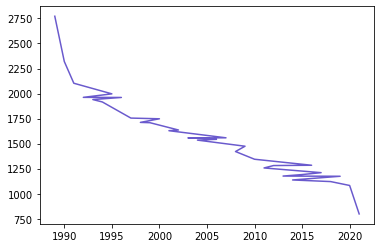

In [99]:
# Line graph for fatalities for different years
df['Year'].value_counts().plot.line(color = 'slateblue')

During the 1990's, there was bad road networks. There was bad training. Technology has improved that has improved safety.

Specific objective: To determine the number of road fatalities is more on weekends than weekdays.

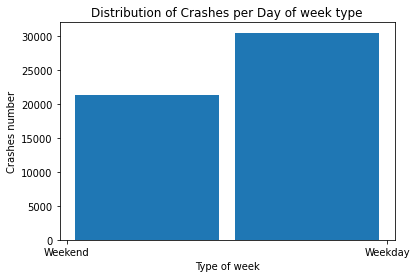

<Figure size 288x216 with 0 Axes>

In [100]:
#creating a histogram for Crashes per Day of week type
plt.hist(df["Day of week"], histtype='bar', rwidth=0.9, bins = 2)
plt.xlabel('Type of week')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week type') 
plt.figure(figsize=(4, 3))
plt.show()

In [101]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['Day of week'] = en.fit_transform(df['Day of week'])
df['State']= en.fit_transform(df['State'])
df['Dayweek']=en.fit_transform(df['Dayweek'])
df['Crash Type']=en.fit_transform(df['Crash Type'])
df['Bus Involvement']=en.fit_transform(df['Bus Involvement'])
df['Articulated Truck Involvement']=en.fit_transform(df['Articulated Truck Involvement'])
df['Road User']=en.fit_transform(df['Road User'])
df['Gender']=en.fit_transform(df['Gender'])
df['Christmas Period']=en.fit_transform(df['Christmas Period'])
df['Easter Period']=en.fit_transform(df['Easter Period'])
df['Time of day']=en.fit_transform(df['Time of day'])
df['Age Group']=en.fit_transform(df['Age Group'])
df['Speed Limit'].replace({'<40':'40','Unspecified':'40'},inplace = True)
df['Speed Limit'] = df['Speed Limit'].astype(int)

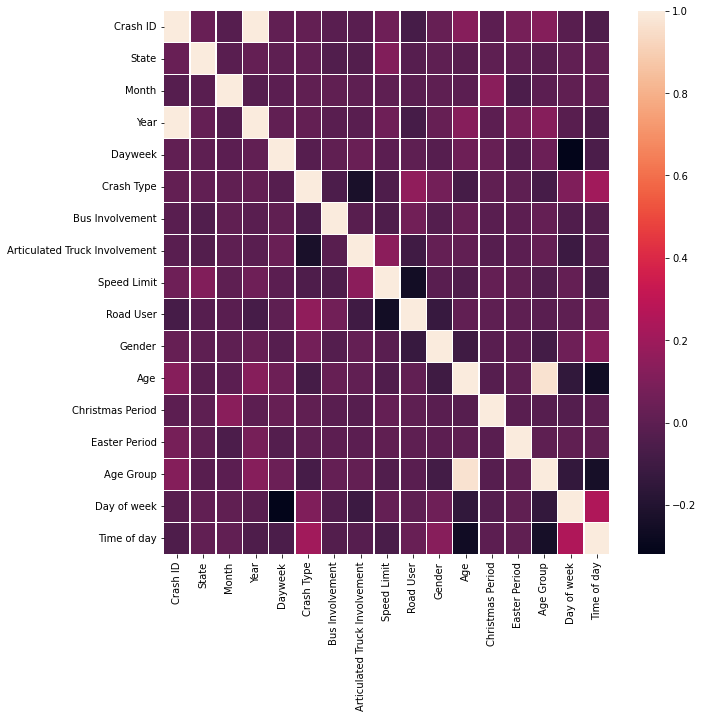

In [102]:
#df.info()
corr_matrix = df.corr()
corr_matrix
#visualising the corrmatrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix, annot=False,  linewidths=.5, ax=ax)

In [103]:
df.head(1)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
1,20214022,4,9,2021,2,2021-11-11 23:31:00,0,0,0,110,6,0,28,0,0,2,1,1


## Multivariate analysis

####Principal Component Analysis

In [104]:

#Splitting the dataset into the Training set and Test set
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X=df[['Crash Type','Christmas Period', 'Easter Period' ]]
sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA()
X = pca.fit_transform(X)

In [105]:
#getting the variance ration
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.33790887, 0.3343618 , 0.32772933])

###Factor Analyzer


In [106]:
!pip install factor_analyzer==0.2.3

In [107]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df[['Crash Type','Christmas Period', 'Easter Period' ]], 3, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev


,Original_Eigenvalues
0,1.013727
1,1.003085
2,0.983188


In [108]:
fa.analyze(df[['Crash Type','Christmas Period', 'Easter Period' ]], 1, rotation="varimax")
fa.loadings

/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:770: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


,Factor1
Crash Type,-0.008032
Christmas Period,-0.997497
Easter Period,0.012787


In [109]:
#getting the vaiance 
fa.get_factor_variance()

,Factor1
SS Loadings,0.995229
Proportion Var,0.331743
Cumulative Var,0.331743


### Hypothesis Testing

Null: The average age of crash fatalities on the weekday is equal to the average age of crash fatalities on the weekend i.e U1 = U2.

Alternative: The average age of crash fatalities on the weekday is not equal to the average age of crash fatalities on the weekend i.e U1 != U2.

where U1 = average age of crash fatalities during the weekend 

U2 is the average age of crush fatalities during the weekday.

In [110]:
# Converting the encoded data to labels

df['Day of week'] = df['Day of week'].replace({0:'Weekday',1:'Weekend',})

df['Day of week'].unique()


array(['Weekend', 'Weekday'], dtype=object)

In [111]:
# Creating a weekend and weekday data frame

df1 = df[df['Day of week']== 'Weekday']

df2 = df[df['Day of week']== 'Weekend']


In [112]:
# Sampling data Randomly
import random
sample_weekday = df1['Age'].sample(n = 1500,random_state=1)

sample_weekend = df2['Age'].sample(n = 1500,random_state=1)


In [113]:
#checking for normality using shapiro test 
#using the level of signifance 0.05

from scipy.stats import shapiro 
stat, p = shapiro(sample_weekday)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

# p_value,1.00 > 0.05 hence failing to reject null hypothesis thus population is from a normal distribution

Statistics=0.961, p=0.000
Sample does not look Gaussian


In [114]:
#checking normality for the weekend population using shapiro

stat, p = shapiro(sample_weekend)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 #p_value,1 > 0.05 hence fail to reject the null hypothesis

Statistics=0.931, p=0.000
Sample does not look Gaussian


In [115]:
#Calculating the p-value, t-test 
from scipy.stats import ttest_ind
statistic, pvalue = ttest_ind(sample_weekday, sample_weekend, equal_var=False)
pvalue = 1 - pvalue

# Printing out the p-value and the statistic

print("p-value of the test = ",pvalue)
print("Statistic = ",statistic)
print("_" * 100)
if pvalue < 0.05:
  print("The average age of crash fatalities on the weekday is equal to the average age of crash fatalaties on the weekend.")
  print("_" * 100) 
else:
  print("The average age of crash fatalities on the weekday is not equal to the average age of crash fatalaties on the weekend.")
 

# Means of the two samples
print(sample_weekday.mean())
print(sample_weekend.mean())

p-value of the test =  0.9999999999999999
Statistic =  8.295265180934074
____________________________________________________________________________________________________
The average age of crash fatalities on the weekday is not equal to the average age of crash fatalaties on the weekend.
42.77333333333333
36.346
